In [1]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

In [2]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [19]:
import pubplot

from schechter     import schechter, named_schechter
from gama_limits   import gama_field
from delta8_limits import d8_limits, delta8_tier
from findfile      import findfile, fetch_fields, fetch_header
from lumfn         import multifield_lumfn
from astropy.table import Table
from params        import fillfactor_threshold

In [4]:
n8 = Table.read(findfile(ftype='ddp_n8'))
n8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RAND_N8,FILLFACTOR,BOUND_DIST,rRANDSEP,rRANDMATCH,rBOUND_DIST,rFILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,float64,int64
396734,587728307494518962,174.84419209,1.48874532,17.966036,0.07693,4,G12_Y6_070_278,6,19.599045,18.460993,18.011465,17.70217,17.538162,0.07693,244.71365380355658,36.94329100748867,G12,2,0,-226.23686238725756,20.41323854637012,5.903636578593534,226.09535829089174,-21.990256874450022,5.655855155770772,0.44952774,17.966036,0.4729940941645066,0,3,-0.1151587621869615,-0.1386251158729516,0.07951795058315417,0.08163672737301295,0.44740896368865685,2.12,-0.0746221,-0.1630916,-18.982151013094537,-18.89368151523506,-19.056773115176313,36.948186855990045,37.02280895807182,36.85971735813057,-0.12265288734182865,-0.1501001866282345,0.09407199102037246,0.11507510308542879,-18.996705053531755,1.8339634,0.1821704610480332,0.0,-5.966036,0.005020578049767177,0.0,2669290.291940297,0 .. 1,1 .. 1,2363.0,0.5509028192626463,2.0822930476205306,0.6345513523937538,22200,2.2150155627219412,0.5325823253569792,36,59,111,-99.0,-99
7540,588848900985585714,178.15000531,0.80061334,19.188776,0.16999,4,G12_Y2_027_071,6,22.206972,20.20373,19.118795,18.613808,18.303358,0.16999,576.4199271202287,38.80369493087599,G12,0,0,-492.36592271390106,15.903283374563546,6.884031830454092,492.2503106955373,-19.336088042891557,6.3445634672762425,1.0849342,19.188776,0.8975355553583038,0,6,-0.015390273440241062,0.1720084058205959,0.2117165871070718,0.5455261201227054,0.751124701603507,0.8,-0.1648903,-0.135992,-19.66174519753991,-19.6906434962803,-19.826635501747713,38.85052121377526,39.01541151798306,38.879419512515646,-0.06012978248397845,0.06407142197584106,0.15659509587822268,0.32924671168950437,-19.606623706311062,0.6112232,0.2165533294651863,0.0,-7.188776,0.0072148329586020615,0.0,4386558.181751358,0 .. 0,1 .. 0,4221.0,1.0,10.321935178983036,0.9299974205998153,1066058,10.09785810981401,1.0,9,18,0,-0.3121587579559484,3
130880,587724649793519865,179.04631112,-2.14729148,18.697596,0.25873,4,G12_Y5_002_305,6,22.107285,19.966759,18.579489,17.988745,17.559137,0.25873,926.1056104884753,39.83330257615837,G12,0,0,-735.1275935320934,12.237337042573014,-27.567326745059457,734.9937398168469,-17.362970346569142,-28.37284590658471,1.38727,18.697596,0.9250766384842138,0,6,0.11050511956583978,0.5726984548365086,0.33711205262554944,0.9562303674711494,0.7681516589092828,0.8,-0.2509681,-0.206984,-21.221850933829998,-21.265835034052586,-21.47281903247044,39.919446530143475,40.17041462878392,39.96343063036606,-0.01470382409501983,0.31050231758403035,0.20202105426718128,0.5756776072976937,-21.08675993547163,1.1024036,0.38031251502092683,0.0,-6.6975956,0.014797157145083391,0.0

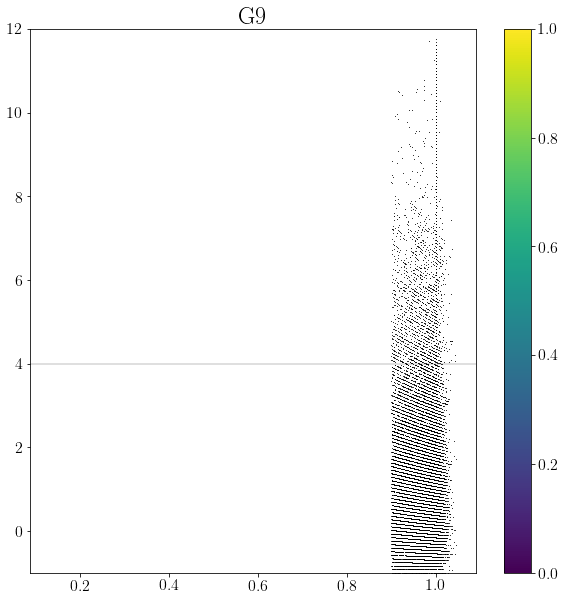

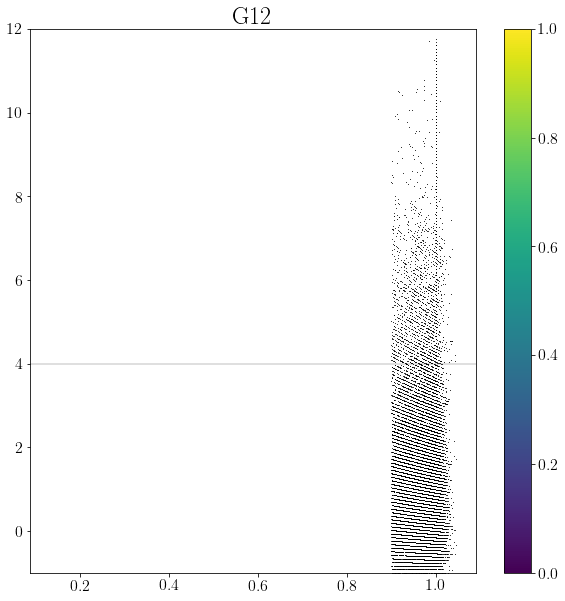

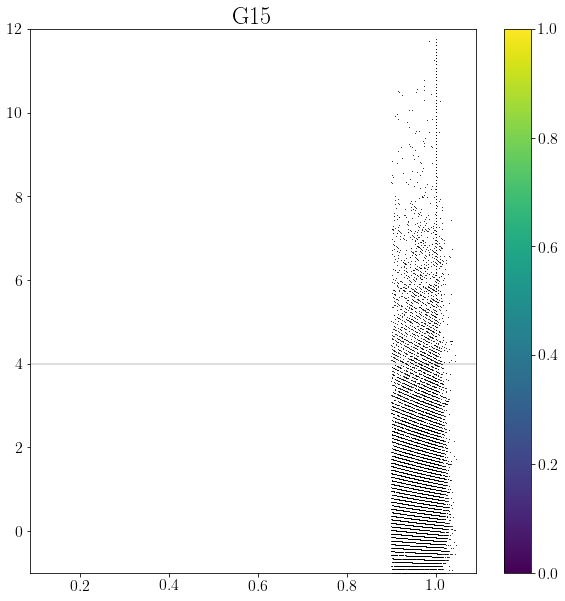

In [16]:
for field in ['G9', 'G12', 'G15']:
    isin = (n8['FIELD'] == field)

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(4., c='k', lw=0.25)
    
    # Note: delta8 defaults to -99 outside the ddp1 volume (e.g. for fillfactor < threshold).
    pl.scatter(n8['FILLFACTOR'], n8['DDP1_DELTA8'], marker='.', lw=0.0, c='k', s=4)
    # pl.xlim(0.75,1.1)
    pl.ylim(-1., 12.)
    pl.title(field)
    pl.colorbar()
    pl.show()

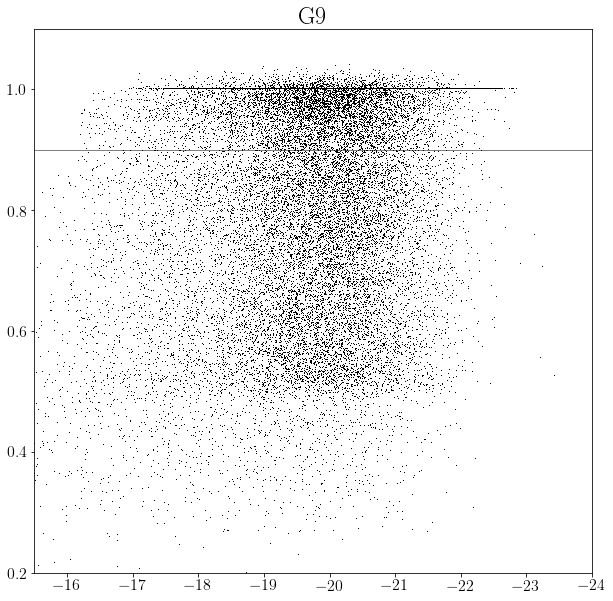

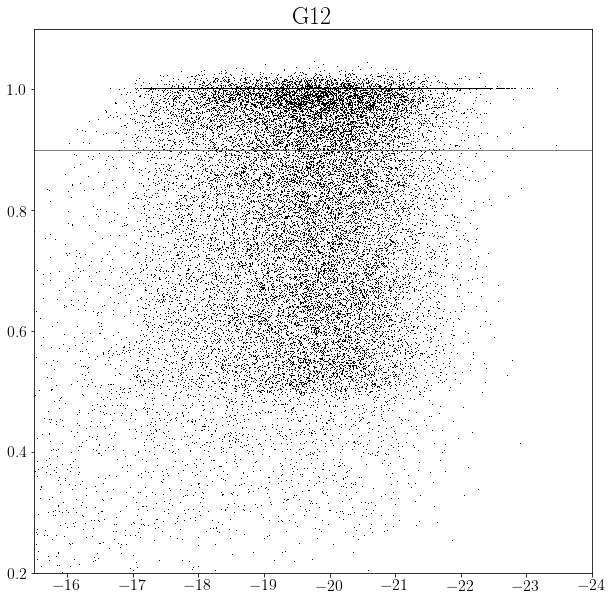

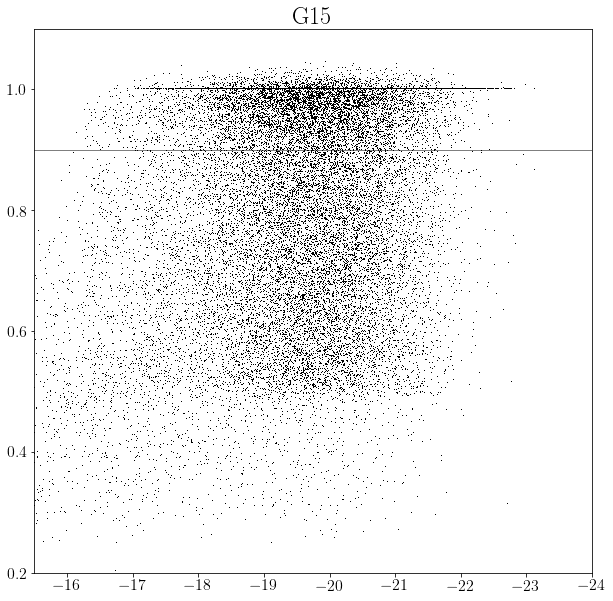

In [20]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(fillfactor_threshold, c='k', lw=0.5)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['FILLFACTOR'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-15.5,-24.)
    pl.ylim(0.2, 1.1)
    pl.title(field)
    pl.show()

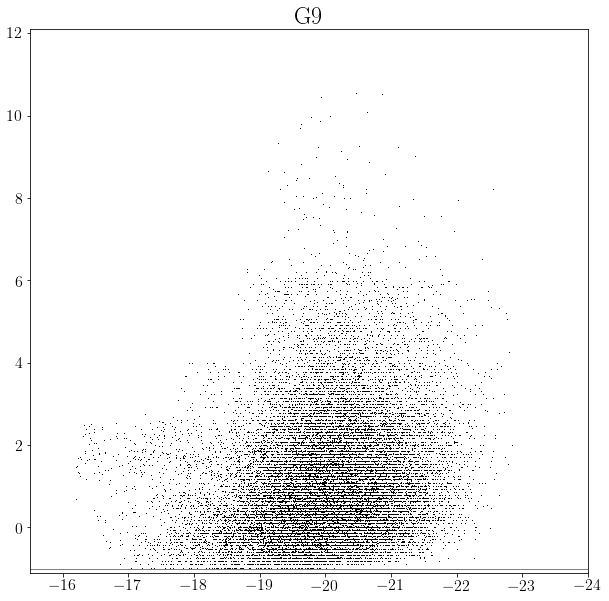

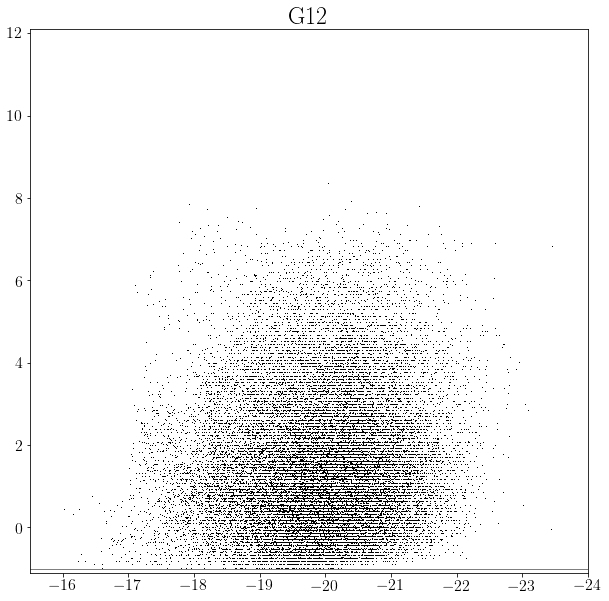

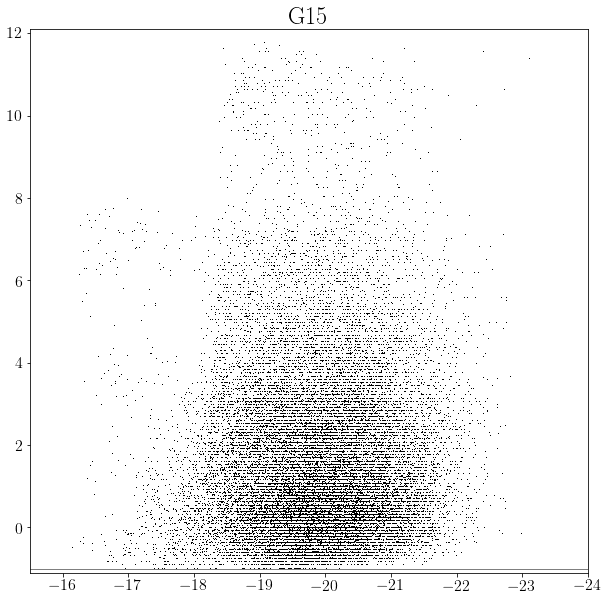

In [21]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(-1., c='k', lw=0.5)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-15.5, -24.)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.show()

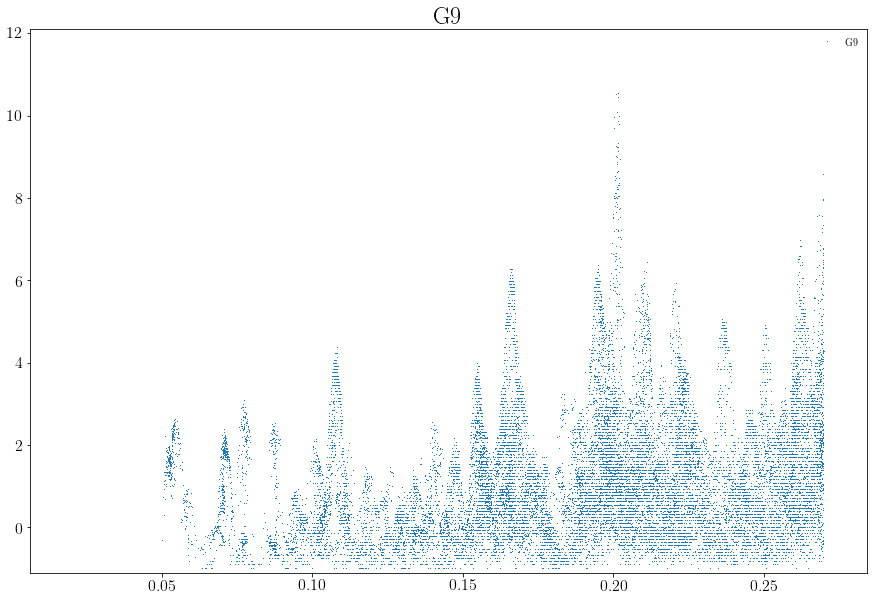

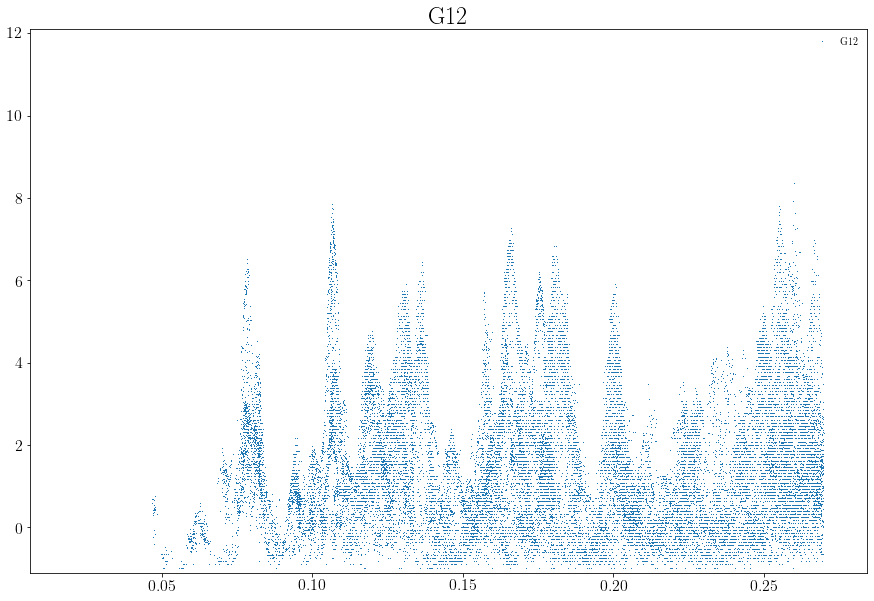

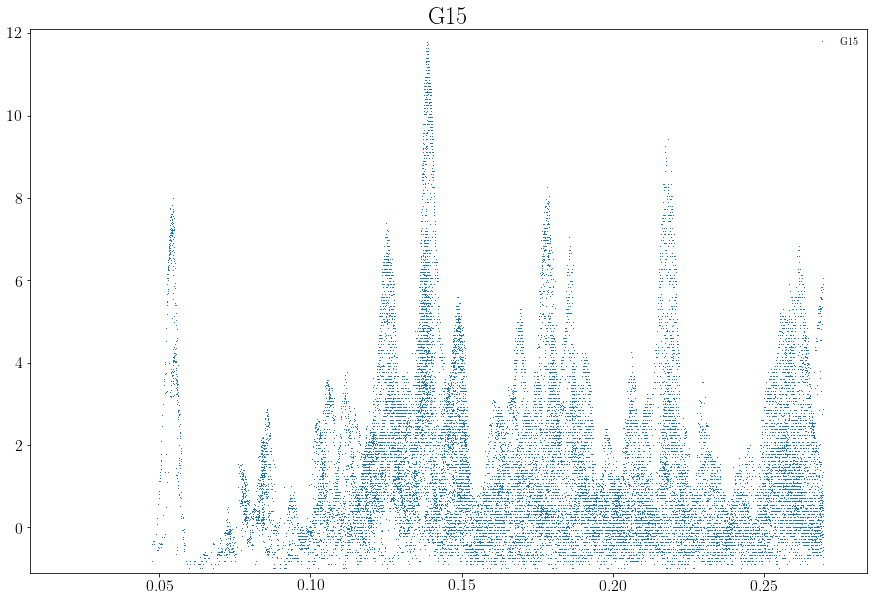

In [7]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(15,10))
    
    pl.sca(ax)
    
    pl.plot(n8['ZSURV'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, label=field)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.legend(frameon=False)

# Done.